~~~sql
-- WordCloud - negative and positive sentiment:

WITH
FIND_EVENT AS 
(   	SELECT title AS word
       	 FROM event, date, description
WHERE fullDate = "28/07/2017" AND felling = 1 AND event.dateID = date.dataID AND event.descriptionID = description.descriptionID
),
COUNT_WORDS AS 
(	SELECT egexp_split_to_table (word, ‘ ‘) AS word_tokenized, COUNT(*) AS number
FROM FIND_EVENT
GROUP BY word_tokenized
),
SELECT word_tokenized, number   // visualização 1
FROM COUNT_WORDS
VISUALIZE AS wordcloud
SELECT word_tokenized, number  // visualização 2
FROM COUNT_WORDS
VISUALIZE AS vbar (word_tokenized, number)
~~~sql

### Negative

In [ ]:
import pandas as pd

# DataFrames
event = pd.read_csv("./data/event.csv")
location = pd.read_csv("./data/location.csv",index_col="locationID")
date = pd.read_csv("./data/date.csv",index_col="dateID")
content = pd.read_csv("./data/content.csv",index_col="contentID")

# Only negative events (WHERE)

event_negative = event[event['NumberNegativeNews']==1]

# Joining tables (WHERE/JOIN)

event_joined = event_negative.join(content, on="contentID").join(date,on="dateID")

# Filtering by date (WHERE)

find_event = event_joined[event_joined['fullDate']=='2017-07-28']['title']

# Splitting words (regexp function)
title_split = find_event.apply(lambda x: x.split(" "))
title_split = title_split.explode("title")

# Grouping words (groupby)
count_words = title_split.groupby(title_split).count()
count_words = count_words.to_frame(name="number").reset_index()
count_words = count_words.rename(columns={"title":"word"})
count_words.head()

,word,number
0,'Skinny',1
1,'The,1
2,'Welcome,1
3,3,1
4,A,3


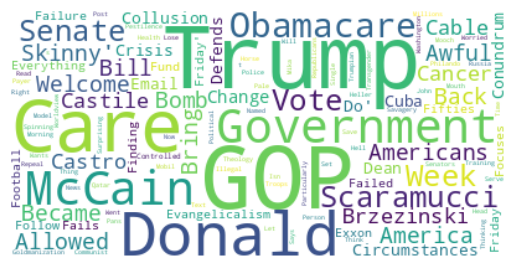

In [104]:
# Visualizing as WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
word_strings = " ".join(count_words.word.to_list())
wordcloud = WordCloud(background_color="white").generate(word_strings)
wordcloud.words_

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


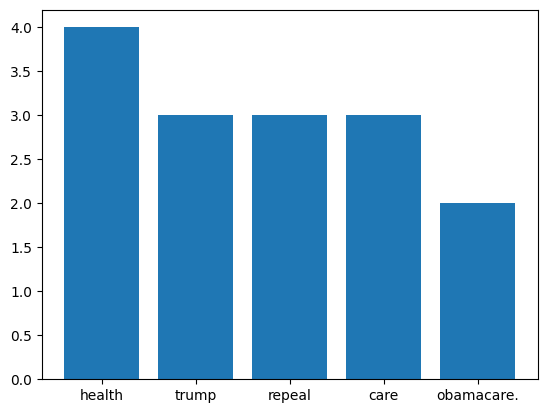

In [ ]:
# Visualizing as VBar
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# We will need to remove stopwords (The, To, Of)

def clean_words(word):
    word = word.replace(".","")
    word = word.replace("'","")
    word = word.replace(",","")
    
    return word.lower()

count_words['word'] = count_words['word'].apply(lambda x: clean_words(x))
count_words_without_stopwords = count_words[~count_words['word'].isin(STOPWORDS)]

# Showing only the top 5 words
count_words_top5 = count_words_without_stopwords.sort_values(by="number", ascending=False)[:5]
vbar = plt.bar(count_words_top5.word,count_words_top5.number)


### Positive

In [106]:
import pandas as pd

# DataFrames
event = pd.read_csv("./data/event.csv")
location = pd.read_csv("./data/location.csv",index_col="locationID")
date = pd.read_csv("./data/date.csv",index_col="dateID")
content = pd.read_csv("./data/content.csv",index_col="contentID")

# Filtering events with negative sentiments only (WHERE)

event_negative = event[event['NumberPositiveNews']==1]

# Joining tables (WHERE/JOIN)

event_joined = event_negative.join(content, on="contentID").join(date,on="dateID")

# Filtering by date (WHERE)

find_event = event_joined[event_joined['fullDate']=='2017-07-28']['title']

# Splitting words (regexp function)

title_split = find_event.apply(lambda x: x.split(" "))
title_split = title_split.explode("title")

# Grouping words (groupby)

count_words = title_split.groupby(title_split).count()
count_words = count_words.to_frame(name="number").reset_index()
count_words = count_words.rename(columns={"title":"word"})
count_words.head()

,word,number
0,'Maverick',1
1,2017,1
2,2020,1
3,"28,",1
4,A,1


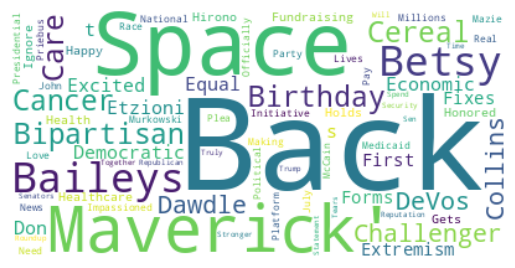

In [107]:
# Visualizing as WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
word_strings = " ".join(count_words.word.to_list())
wordcloud = WordCloud(background_color="white").generate(word_strings)
wordcloud.words_

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


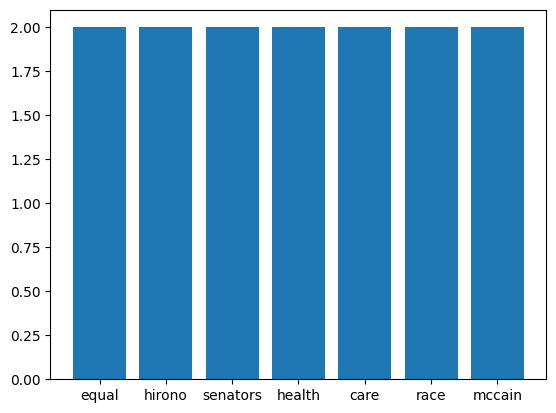

In [ ]:
# Visualizing as VBar
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# We will need to remove stopwords (The, To, Of)

def clean_words(word):
    word = word.replace(".","")
    word = word.replace("'","")
    word = word.replace(",","")
    
    return word.lower()

count_words['word'] = count_words['word'].apply(lambda x: clean_words)
count_words_without_stopwords = count_words[~count_words['word'].isin(STOPWORDS)]
count_words_without_stopwords.head()
# Showing only the top 5 words
count_words_top = count_words_without_stopwords.sort_values(by="number", ascending=False)[:7]
vbar = plt.bar(count_words_top.word,count_words_top.number)
